#Inline Image Patcher
This notebook show how to patch the basemaps and featuremaps into consistant size tiles.

# Dependencies



In [1]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import json
import cv2
import numpy as np
from patchify import patchify
from matplotlib import pyplot as plt

# Image Patcher
Note that when submitting the patch_dims to the patchify call you need to add the channel dimension as well. 
ex (*patch_dims,3) becomes (512,512,3)

In [3]:
trainDataFolder = 'training'

# PatchSettings
patch_dims = (512,512)
patch_overlap = 64
patch_step = patch_dims[1]-patch_overlap

In [5]:
# Iterate through each json file.
for file in os.listdir(trainDataFolder):
    if not file.endswith(".json"):
        continue
    
    with open(os.path.join(trainDataFolder, file)) as fh:
        json_data = json.load(fh)

    base_filePath = os.path.join(trainDataFolder, json_data['imagePath'])
    base_img = cv2.imread(base_filePath)
    
    # Base Map Patches
    base_patchs = patchify(base_img, (*patch_dims,3), step=patch_step)

    for shape in json_data['shapes']:
        feature_filename = os.path.join(trainDataFolder, json_data['imagePath'].split('.')[0] + '_' + shape['label'] + '.tif')
        print(feature_filename)
        feature_img = cv2.imread(feature_filename)

        # Feature Map Patches
        feature_patchs = patchify(feature_img, (*patch_dims,1), step=patch_step)

training/AK_PointLay_Estimated_pt.tif
training/AK_PointLay_Fault_line.tif
training/AK_PointLay_Horizontal_pt.tif
training/AK_PointLay_Inclined_pt.tif
training/AK_PointLay_Knl_poly.tif
training/AK_PointLay_Knu_poly.tif
training/AK_PointLay_Kto_poly.tif
training/AK_PointLay_Qal_poly.tif
training/AK_PointLay_Qb_poly.tif
training/AK_PointLay_Qu_poly.tif
training/AK_PointLay_ThrFault_line.tif
training/AK_PointLay_WrFault_line.tif


# Example Plot
This is a 3x3 sample of the tiled map. Defaults to the center of the map

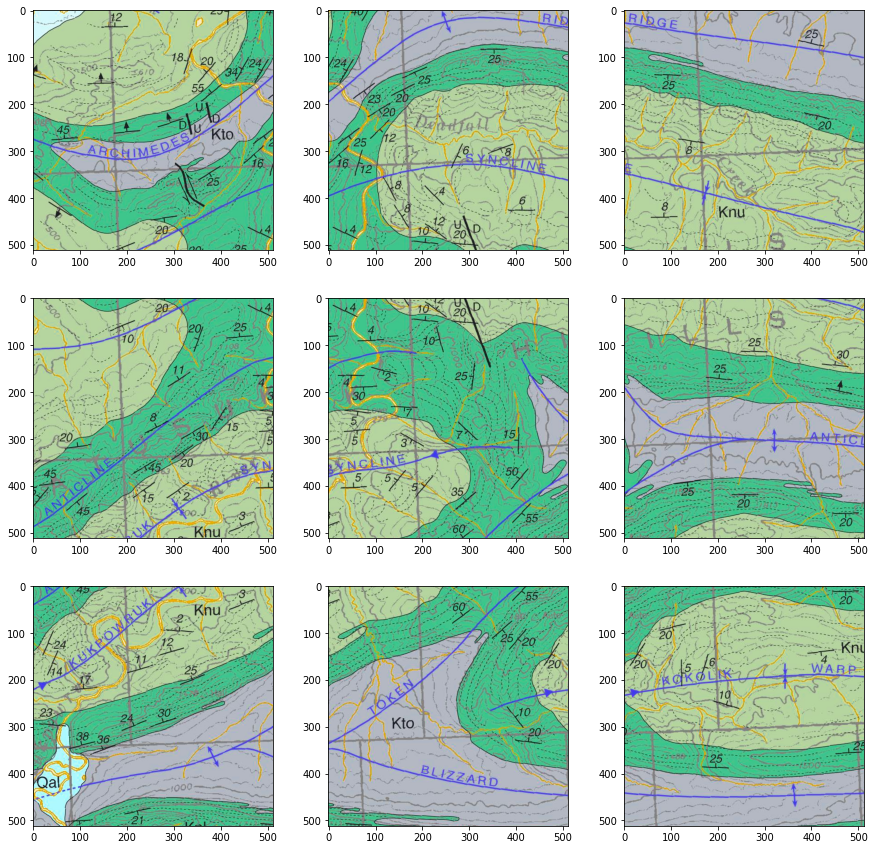

In [6]:
plot_patchs = base_patchs
center_tile = (len(plot_patchs)//2,len(plot_patchs[0])//2)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs[0][0].imshow(plot_patchs[center_tile[0]-1][center_tile[1]-1][0])
axs[0][1].imshow(plot_patchs[center_tile[0]-1][center_tile[1]][0])
axs[0][2].imshow(plot_patchs[center_tile[0]-1][center_tile[1]+1][0])

axs[1][0].imshow(plot_patchs[center_tile[0]][center_tile[1]-1][0])
axs[1][1].imshow(plot_patchs[center_tile[0]][center_tile[1]][0])
axs[1][2].imshow(plot_patchs[center_tile[0]][center_tile[1]+1][0])

axs[2][0].imshow(plot_patchs[center_tile[0]+1][center_tile[1]-1][0])
axs[2][1].imshow(plot_patchs[center_tile[0]+1][center_tile[1]][0])
axs[2][2].imshow(plot_patchs[center_tile[0]+1][center_tile[1]+1][0])

plt.show()